#Activity 7

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import random


url = 'https://raw.githubusercontent.com/pango3001/AI/main/project/adult1.csv'

#numpy darray
data = np.genfromtxt(url, delimiter=",", skip_header = True) 

#panda dataframe
dataset = pd.read_csv(url, delimiter=',')
dataset.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0


In [2]:
# Shuffle the dataset
# NOTE: shuffle dataframe in-place and reset the index
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas Dataframe to Numpy dArray
dataset_np = dataset.values
X = dataset.drop('age', axis='columns').values
Y = dataset['age'].values

###Sizes of the Splits

In [3]:
# Index for 30% --- Normal
index_30percent = int(0.3 * len(dataset_np[:, 0]))
print(index_30percent)

# Index for 2%
index_2percent = int(0.02 * len(dataset_np[:, 0]))
print(index_2percent)

# Index for 98%
index_98percent = int(0.98 * len(dataset_np[:, 0]))
print(index_98percent)

9768
651
31909


## Datasets

### Normal Validation Dataset

In [4]:
# Split into training and validation
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]

XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

print(XTRAIN.shape)
print(YTRAIN.shape)

print(XVALID.shape)
print(YVALID.shape)


## Mean normalization
min = XTRAIN.min(axis = 0) 
max = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (max - min)
XVALID = (XVALID - mean) / (max - min)

## Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

(22793, 13)
(22793,)
(9768, 13)
(9768,)


### Too Small Validation Dataset 

In [5]:
# Split into training and validation
XVALID_2 = X[:index_2percent, :]
YVALID_2 = Y[:index_2percent]

XTRAIN_2 = X[index_2percent:, :]
YTRAIN_2 = Y[index_2percent:]

## Mean normalization
min = XTRAIN_2.min(axis = 0) 
max = XTRAIN_2.max(axis = 0) 
mean = XTRAIN_2.mean(axis = 0)
XTRAIN_2 = (XTRAIN_2 - mean) / (max - min)
XVALID_2 = (XVALID_2 - mean) / (max - min)

## Rescaling
Ymax = YTRAIN_2.max()
YTRAIN_2 = YTRAIN_2 / Ymax
YVALID_2 = YVALID_2 / Ymax

### Too Small Training Dataset 

In [6]:
# Split into training and validation
XVALID_98 = X[:index_98percent, :]
YVALID_98 = Y[:index_98percent]

XTRAIN_98 = X[index_98percent:, :]
YTRAIN_98 = Y[index_98percent:]

## Mean normalization
min = XTRAIN_98.min(axis = 0) 
max = XTRAIN_98.max(axis = 0) 
mean = XTRAIN_98.mean(axis = 0)
XTRAIN_98 = (XTRAIN_98 - mean) / (max - min)
XVALID_98 = (XVALID_98 - mean) / (max - min)

## Rescaling
Ymax = YTRAIN_98.max()
YTRAIN_98 = YTRAIN_98 / Ymax
YVALID_98 = YVALID_98 / Ymax

## Build a neural network

In [7]:
model = Sequential()
model.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Normal Dataset
model.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 256, batch_size=64, verbose=1)

Epoch 1/256
357/357 [==============================] - 2s 3ms/step - loss: 0.0181 - mae: 0.1070 - val_loss: 0.0160 - val_mae: 0.0985
Epoch 2/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0154 - mae: 0.0970 - val_loss: 0.0153 - val_mae: 0.0959
Epoch 3/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0150 - mae: 0.0952 - val_loss: 0.0150 - val_mae: 0.0948
Epoch 4/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0147 - mae: 0.0942 - val_loss: 0.0148 - val_mae: 0.0930
Epoch 5/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0144 - mae: 0.0934 - val_loss: 0.0145 - val_mae: 0.0933
Epoch 6/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0143 - mae: 0.0927 - val_loss: 0.0144 - val_mae: 0.0936
Epoch 7/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0141 - mae: 0.0923 - val_loss: 0.0142 - val_mae: 0.0920
Epoch 8/256
357/357 [==============================] - 1s 2ms/step - 

357/357 [==============================] - 1s 3ms/step - loss: 0.0127 - mae: 0.0868 - val_loss: 0.0130 - val_mae: 0.0883
Epoch 63/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0127 - mae: 0.0869 - val_loss: 0.0130 - val_mae: 0.0884
Epoch 64/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0126 - mae: 0.0868 - val_loss: 0.0130 - val_mae: 0.0875
Epoch 65/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0126 - mae: 0.0867 - val_loss: 0.0130 - val_mae: 0.0878
Epoch 66/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0126 - mae: 0.0868 - val_loss: 0.0130 - val_mae: 0.0877
Epoch 67/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0126 - mae: 0.0867 - val_loss: 0.0130 - val_mae: 0.0883
Epoch 68/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0126 - mae: 0.0867 - val_loss: 0.0130 - val_mae: 0.0877
Epoch 69/256
357/357 [==============================] - 1s 3ms/step - loss:

357/357 [==============================] - 1s 3ms/step - loss: 0.0125 - mae: 0.0861 - val_loss: 0.0129 - val_mae: 0.0878
Epoch 124/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0125 - mae: 0.0861 - val_loss: 0.0130 - val_mae: 0.0870
Epoch 125/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0125 - mae: 0.0860 - val_loss: 0.0130 - val_mae: 0.0872
Epoch 126/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0125 - mae: 0.0861 - val_loss: 0.0130 - val_mae: 0.0880
Epoch 127/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0125 - mae: 0.0860 - val_loss: 0.0130 - val_mae: 0.0877
Epoch 128/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0125 - mae: 0.0861 - val_loss: 0.0130 - val_mae: 0.0874
Epoch 129/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0125 - mae: 0.0860 - val_loss: 0.0130 - val_mae: 0.0867
Epoch 130/256
357/357 [==============================] - 1s 3ms/step 

Epoch 184/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0858 - val_loss: 0.0129 - val_mae: 0.0870
Epoch 185/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0858 - val_loss: 0.0129 - val_mae: 0.0879
Epoch 186/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0859 - val_loss: 0.0130 - val_mae: 0.0865
Epoch 187/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0858 - val_loss: 0.0130 - val_mae: 0.0868
Epoch 188/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0858 - val_loss: 0.0129 - val_mae: 0.0882
Epoch 189/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0859 - val_loss: 0.0130 - val_mae: 0.0864
Epoch 190/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0857 - val_loss: 0.0130 - val_mae: 0.0891
Epoch 191/256
357/357 [==============================] 

357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0857 - val_loss: 0.0129 - val_mae: 0.0872
Epoch 245/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0857 - val_loss: 0.0129 - val_mae: 0.0887
Epoch 246/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0857 - val_loss: 0.0129 - val_mae: 0.0868
Epoch 247/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0857 - val_loss: 0.0128 - val_mae: 0.0875
Epoch 248/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0856 - val_loss: 0.0128 - val_mae: 0.0874
Epoch 249/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0857 - val_loss: 0.0129 - val_mae: 0.0880
Epoch 250/256
357/357 [==============================] - 1s 2ms/step - loss: 0.0124 - mae: 0.0857 - val_loss: 0.0130 - val_mae: 0.0891
Epoch 251/256
357/357 [==============================] - 1s 2ms/step 

In [9]:
print(history.params)

{'verbose': 1, 'epochs': 256, 'steps': 357}


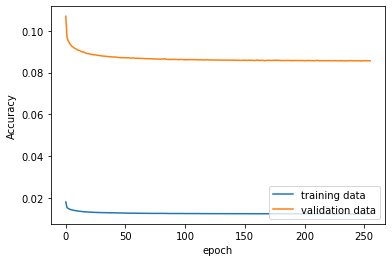

In [10]:
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

## Small Validation NN

In [11]:
modelsv = Sequential()
modelsv.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelsv.add(Dense(7, activation='relu'))
modelsv.add(Dense(1, activation='sigmoid'))

In [12]:
# Too Small Validation Set
modelsv.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historysv = modelsv.fit(XTRAIN_2, YTRAIN_2, validation_data=(XVALID_2, YVALID_2), epochs = 256, batch_size=128, verbose=1)

Epoch 1/256
250/250 [==============================] - 1s 3ms/step - loss: 0.0206 - mae: 0.1176 - val_loss: 0.0176 - val_mae: 0.1080
Epoch 2/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0161 - mae: 0.1011 - val_loss: 0.0161 - val_mae: 0.1011
Epoch 3/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0150 - mae: 0.0966 - val_loss: 0.0150 - val_mae: 0.0980
Epoch 4/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0144 - mae: 0.0943 - val_loss: 0.0147 - val_mae: 0.0952
Epoch 5/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0140 - mae: 0.0928 - val_loss: 0.0143 - val_mae: 0.0944
Epoch 6/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0138 - mae: 0.0917 - val_loss: 0.0141 - val_mae: 0.0934
Epoch 7/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0137 - mae: 0.0912 - val_loss: 0.0140 - val_mae: 0.0930
Epoch 8/256
250/250 [==============================] - 1s 2ms/step - 

250/250 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.0875 - val_loss: 0.0132 - val_mae: 0.0903
Epoch 63/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0129 - mae: 0.0875 - val_loss: 0.0132 - val_mae: 0.0902
Epoch 64/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0129 - mae: 0.0875 - val_loss: 0.0133 - val_mae: 0.0891
Epoch 65/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0129 - mae: 0.0874 - val_loss: 0.0132 - val_mae: 0.0900
Epoch 66/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0129 - mae: 0.0875 - val_loss: 0.0132 - val_mae: 0.0895
Epoch 67/256
250/250 [==============================] - 1s 4ms/step - loss: 0.0129 - mae: 0.0874 - val_loss: 0.0133 - val_mae: 0.0892
Epoch 68/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0128 - mae: 0.0873 - val_loss: 0.0132 - val_mae: 0.0892
Epoch 69/256
250/250 [==============================] - 1s 2ms/step - loss:

250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0869 - val_loss: 0.0131 - val_mae: 0.0884
Epoch 124/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0868 - val_loss: 0.0130 - val_mae: 0.0897
Epoch 125/256
250/250 [==============================] - 0s 2ms/step - loss: 0.0127 - mae: 0.0869 - val_loss: 0.0130 - val_mae: 0.0900
Epoch 126/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0870 - val_loss: 0.0132 - val_mae: 0.0888
Epoch 127/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0869 - val_loss: 0.0131 - val_mae: 0.0898
Epoch 128/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0869 - val_loss: 0.0130 - val_mae: 0.0891
Epoch 129/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0869 - val_loss: 0.0132 - val_mae: 0.0882
Epoch 130/256
250/250 [==============================] - 1s 2ms/step 

Epoch 184/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0866 - val_loss: 0.0131 - val_mae: 0.0903
Epoch 185/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0867 - val_loss: 0.0130 - val_mae: 0.0895
Epoch 186/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0866 - val_loss: 0.0131 - val_mae: 0.0894
Epoch 187/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0868 - val_loss: 0.0131 - val_mae: 0.0889
Epoch 188/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0867 - val_loss: 0.0130 - val_mae: 0.0897
Epoch 189/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0867 - val_loss: 0.0130 - val_mae: 0.0894
Epoch 190/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0867 - val_loss: 0.0131 - val_mae: 0.0895
Epoch 191/256
250/250 [==============================] 

250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0867 - val_loss: 0.0132 - val_mae: 0.0896
Epoch 245/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0867 - val_loss: 0.0132 - val_mae: 0.0903
Epoch 246/256
250/250 [==============================] - 0s 2ms/step - loss: 0.0127 - mae: 0.0866 - val_loss: 0.0131 - val_mae: 0.0888
Epoch 247/256
250/250 [==============================] - 1s 2ms/step - loss: 0.0127 - mae: 0.0867 - val_loss: 0.0131 - val_mae: 0.0896
Epoch 248/256
250/250 [==============================] - 0s 2ms/step - loss: 0.0126 - mae: 0.0866 - val_loss: 0.0130 - val_mae: 0.0895
Epoch 249/256
250/250 [==============================] - 0s 2ms/step - loss: 0.0127 - mae: 0.0868 - val_loss: 0.0132 - val_mae: 0.0887
Epoch 250/256
250/250 [==============================] - 0s 2ms/step - loss: 0.0126 - mae: 0.0866 - val_loss: 0.0131 - val_mae: 0.0908
Epoch 251/256
250/250 [==============================] - 1s 3ms/step 

{'verbose': 1, 'epochs': 256, 'steps': 250}


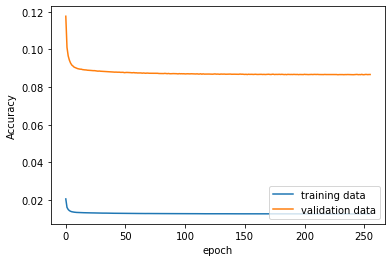

In [13]:
print(historysv.params)
plt.plot(historysv.history['loss']) # replace with accuracy/MAE
plt.plot(historysv.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

##Small Training NN

In [14]:
modelst = Sequential()
modelst.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelst.add(Dense(7, activation='relu'))
modelst.add(Dense(1, activation='sigmoid'))

In [15]:
# Too Small Valid
modelst.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyst = modelst.fit(XTRAIN_98, YTRAIN_98, validation_data=(XVALID_98, YVALID_98), epochs = 256, batch_size=128, verbose=1)

Epoch 1/256
6/6 [==============================] - 1s 117ms/step - loss: 0.0276 - mae: 0.1402 - val_loss: 0.0262 - val_mae: 0.1363
Epoch 2/256
6/6 [==============================] - 0s 73ms/step - loss: 0.0269 - mae: 0.1384 - val_loss: 0.0256 - val_mae: 0.1345
Epoch 3/256
6/6 [==============================] - 0s 73ms/step - loss: 0.0263 - mae: 0.1366 - val_loss: 0.0249 - val_mae: 0.1326
Epoch 4/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0256 - mae: 0.1347 - val_loss: 0.0243 - val_mae: 0.1308
Epoch 5/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0250 - mae: 0.1329 - val_loss: 0.0237 - val_mae: 0.1292
Epoch 6/256
6/6 [==============================] - 0s 71ms/step - loss: 0.0244 - mae: 0.1313 - val_loss: 0.0231 - val_mae: 0.1274
Epoch 7/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0238 - mae: 0.1295 - val_loss: 0.0226 - val_mae: 0.1259
Epoch 8/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0233 - mae: 0.1

6/6 [==============================] - 0s 71ms/step - loss: 0.0145 - mae: 0.0946 - val_loss: 0.0162 - val_mae: 0.0999
Epoch 64/256
6/6 [==============================] - 0s 73ms/step - loss: 0.0145 - mae: 0.0947 - val_loss: 0.0162 - val_mae: 0.1001
Epoch 65/256
6/6 [==============================] - 0s 74ms/step - loss: 0.0145 - mae: 0.0949 - val_loss: 0.0162 - val_mae: 0.1003
Epoch 66/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0144 - mae: 0.0948 - val_loss: 0.0162 - val_mae: 0.1003
Epoch 67/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0144 - mae: 0.0946 - val_loss: 0.0162 - val_mae: 0.1001
Epoch 68/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0144 - mae: 0.0944 - val_loss: 0.0162 - val_mae: 0.1000
Epoch 69/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0144 - mae: 0.0944 - val_loss: 0.0162 - val_mae: 0.1002
Epoch 70/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0144 - mae: 0.0946 - 

6/6 [==============================] - 0s 72ms/step - loss: 0.0135 - mae: 0.0910 - val_loss: 0.0160 - val_mae: 0.0991
Epoch 126/256
6/6 [==============================] - 0s 71ms/step - loss: 0.0135 - mae: 0.0910 - val_loss: 0.0160 - val_mae: 0.0992
Epoch 127/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0135 - mae: 0.0910 - val_loss: 0.0160 - val_mae: 0.0991
Epoch 128/256
6/6 [==============================] - 0s 71ms/step - loss: 0.0135 - mae: 0.0909 - val_loss: 0.0160 - val_mae: 0.0990
Epoch 129/256
6/6 [==============================] - 0s 75ms/step - loss: 0.0135 - mae: 0.0907 - val_loss: 0.0159 - val_mae: 0.0987
Epoch 130/256
6/6 [==============================] - 0s 74ms/step - loss: 0.0134 - mae: 0.0902 - val_loss: 0.0159 - val_mae: 0.0982
Epoch 131/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0134 - mae: 0.0900 - val_loss: 0.0159 - val_mae: 0.0980
Epoch 132/256
6/6 [==============================] - 0s 71ms/step - loss: 0.0134 - mae: 0.

6/6 [==============================] - 0s 74ms/step - loss: 0.0127 - mae: 0.0876 - val_loss: 0.0158 - val_mae: 0.0977
Epoch 188/256
6/6 [==============================] - 0s 74ms/step - loss: 0.0127 - mae: 0.0876 - val_loss: 0.0158 - val_mae: 0.0979
Epoch 189/256
6/6 [==============================] - 0s 75ms/step - loss: 0.0127 - mae: 0.0876 - val_loss: 0.0158 - val_mae: 0.0977
Epoch 190/256
6/6 [==============================] - 0s 74ms/step - loss: 0.0127 - mae: 0.0875 - val_loss: 0.0158 - val_mae: 0.0975
Epoch 191/256
6/6 [==============================] - 0s 74ms/step - loss: 0.0127 - mae: 0.0874 - val_loss: 0.0158 - val_mae: 0.0973
Epoch 192/256
6/6 [==============================] - 0s 73ms/step - loss: 0.0127 - mae: 0.0874 - val_loss: 0.0158 - val_mae: 0.0976
Epoch 193/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0127 - mae: 0.0876 - val_loss: 0.0157 - val_mae: 0.0978
Epoch 194/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0126 - mae: 0.

6/6 [==============================] - 0s 74ms/step - loss: 0.0120 - mae: 0.0857 - val_loss: 0.0157 - val_mae: 0.0973
Epoch 250/256
6/6 [==============================] - 0s 74ms/step - loss: 0.0121 - mae: 0.0856 - val_loss: 0.0157 - val_mae: 0.0968
Epoch 251/256
6/6 [==============================] - 0s 74ms/step - loss: 0.0120 - mae: 0.0856 - val_loss: 0.0156 - val_mae: 0.0973
Epoch 252/256
6/6 [==============================] - 0s 74ms/step - loss: 0.0121 - mae: 0.0862 - val_loss: 0.0156 - val_mae: 0.0980
Epoch 253/256
6/6 [==============================] - 0s 73ms/step - loss: 0.0121 - mae: 0.0865 - val_loss: 0.0156 - val_mae: 0.0981
Epoch 254/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0120 - mae: 0.0862 - val_loss: 0.0156 - val_mae: 0.0974
Epoch 255/256
6/6 [==============================] - 0s 73ms/step - loss: 0.0120 - mae: 0.0857 - val_loss: 0.0157 - val_mae: 0.0973
Epoch 256/256
6/6 [==============================] - 0s 72ms/step - loss: 0.0120 - mae: 0.

{'verbose': 1, 'epochs': 256, 'steps': 6}


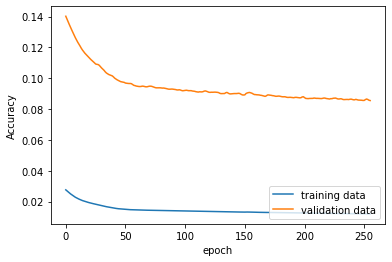

In [16]:
print(historyst.params)
plt.plot(historyst.history['loss']) # replace with accuracy/MAE
plt.plot(historyst.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

##Underfit NN


In [17]:
modelu = Sequential()
modelu.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelu.add(Dense(7, activation='relu'))
modelu.add(Dense(1, activation='sigmoid'))

In [18]:
modelu.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyu = modelu.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 10, batch_size=128, verbose=1)

Epoch 1/10
179/179 [==============================] - 1s 4ms/step - loss: 0.0206 - mae: 0.1172 - val_loss: 0.0176 - val_mae: 0.1067
Epoch 2/10
179/179 [==============================] - 1s 5ms/step - loss: 0.0162 - mae: 0.1009 - val_loss: 0.0158 - val_mae: 0.0988
Epoch 3/10
179/179 [==============================] - 1s 4ms/step - loss: 0.0153 - mae: 0.0971 - val_loss: 0.0154 - val_mae: 0.0976
Epoch 4/10
179/179 [==============================] - 1s 5ms/step - loss: 0.0150 - mae: 0.0959 - val_loss: 0.0151 - val_mae: 0.0962
Epoch 5/10
179/179 [==============================] - 1s 4ms/step - loss: 0.0148 - mae: 0.0951 - val_loss: 0.0149 - val_mae: 0.0948
Epoch 6/10
179/179 [==============================] - 0s 3ms/step - loss: 0.0145 - mae: 0.0941 - val_loss: 0.0146 - val_mae: 0.0944
Epoch 7/10
179/179 [==============================] - 0s 3ms/step - loss: 0.0143 - mae: 0.0932 - val_loss: 0.0144 - val_mae: 0.0933
Epoch 8/10
179/179 [==============================] - 0s 3ms/step - loss: 0.

{'verbose': 1, 'epochs': 10, 'steps': 179}


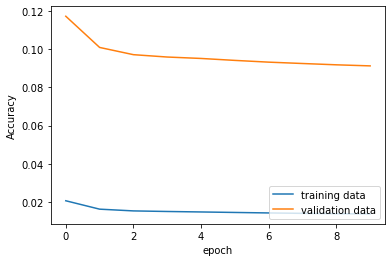

In [19]:
print(historyu.params)
plt.plot(historyu.history['loss']) # replace with accuracy/MAE
plt.plot(historyu.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

##Overfit NN

In [20]:
modelo = Sequential()
modelo.add(Dense(130, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelo.add(Dense(130, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [21]:
modelo.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyo = modelo.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 256, batch_size=128, verbose=1)

Epoch 1/256
179/179 [==============================] - 1s 5ms/step - loss: 0.0160 - mae: 0.1000 - val_loss: 0.0144 - val_mae: 0.0945
Epoch 2/256
179/179 [==============================] - 1s 5ms/step - loss: 0.0138 - mae: 0.0917 - val_loss: 0.0137 - val_mae: 0.0917
Epoch 3/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0133 - mae: 0.0894 - val_loss: 0.0136 - val_mae: 0.0888
Epoch 4/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0131 - mae: 0.0887 - val_loss: 0.0133 - val_mae: 0.0893
Epoch 5/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0130 - mae: 0.0880 - val_loss: 0.0132 - val_mae: 0.0875
Epoch 6/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0128 - mae: 0.0874 - val_loss: 0.0131 - val_mae: 0.0877
Epoch 7/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0127 - mae: 0.0870 - val_loss: 0.0129 - val_mae: 0.0879
Epoch 8/256
179/179 [==============================] - 1s 4ms/step - 

179/179 [==============================] - 1s 3ms/step - loss: 0.0109 - mae: 0.0804 - val_loss: 0.0128 - val_mae: 0.0868
Epoch 63/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0109 - mae: 0.0802 - val_loss: 0.0127 - val_mae: 0.0869
Epoch 64/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0110 - mae: 0.0804 - val_loss: 0.0128 - val_mae: 0.0859
Epoch 65/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0109 - mae: 0.0802 - val_loss: 0.0128 - val_mae: 0.0875
Epoch 66/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0109 - mae: 0.0801 - val_loss: 0.0128 - val_mae: 0.0863
Epoch 67/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0109 - mae: 0.0802 - val_loss: 0.0128 - val_mae: 0.0860
Epoch 68/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0108 - mae: 0.0799 - val_loss: 0.0129 - val_mae: 0.0872
Epoch 69/256
179/179 [==============================] - 1s 4ms/step - loss:

179/179 [==============================] - 1s 3ms/step - loss: 0.0100 - mae: 0.0763 - val_loss: 0.0134 - val_mae: 0.0883
Epoch 124/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0099 - mae: 0.0761 - val_loss: 0.0134 - val_mae: 0.0879
Epoch 125/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0099 - mae: 0.0761 - val_loss: 0.0135 - val_mae: 0.0888
Epoch 126/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0099 - mae: 0.0759 - val_loss: 0.0135 - val_mae: 0.0882
Epoch 127/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0099 - mae: 0.0760 - val_loss: 0.0136 - val_mae: 0.0889
Epoch 128/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0099 - mae: 0.0759 - val_loss: 0.0136 - val_mae: 0.0883
Epoch 129/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0099 - mae: 0.0760 - val_loss: 0.0135 - val_mae: 0.0882
Epoch 130/256
179/179 [==============================] - 1s 3ms/step 

Epoch 184/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0092 - mae: 0.0731 - val_loss: 0.0143 - val_mae: 0.0900
Epoch 185/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0092 - mae: 0.0729 - val_loss: 0.0141 - val_mae: 0.0915
Epoch 186/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0093 - mae: 0.0733 - val_loss: 0.0143 - val_mae: 0.0912
Epoch 187/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0093 - mae: 0.0732 - val_loss: 0.0142 - val_mae: 0.0909
Epoch 188/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0093 - mae: 0.0732 - val_loss: 0.0143 - val_mae: 0.0906
Epoch 189/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0092 - mae: 0.0728 - val_loss: 0.0144 - val_mae: 0.0912
Epoch 190/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0092 - mae: 0.0729 - val_loss: 0.0142 - val_mae: 0.0907
Epoch 191/256
179/179 [==============================] 

179/179 [==============================] - 1s 3ms/step - loss: 0.0087 - mae: 0.0706 - val_loss: 0.0146 - val_mae: 0.0919
Epoch 245/256
179/179 [==============================] - 0s 2ms/step - loss: 0.0087 - mae: 0.0705 - val_loss: 0.0148 - val_mae: 0.0932
Epoch 246/256
179/179 [==============================] - 0s 3ms/step - loss: 0.0087 - mae: 0.0706 - val_loss: 0.0148 - val_mae: 0.0937
Epoch 247/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0087 - mae: 0.0705 - val_loss: 0.0149 - val_mae: 0.0930
Epoch 248/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0087 - mae: 0.0703 - val_loss: 0.0147 - val_mae: 0.0928
Epoch 249/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0087 - mae: 0.0702 - val_loss: 0.0148 - val_mae: 0.0922
Epoch 250/256
179/179 [==============================] - 1s 4ms/step - loss: 0.0086 - mae: 0.0702 - val_loss: 0.0149 - val_mae: 0.0920
Epoch 251/256
179/179 [==============================] - 1s 3ms/step 

{'verbose': 1, 'epochs': 256, 'steps': 179}


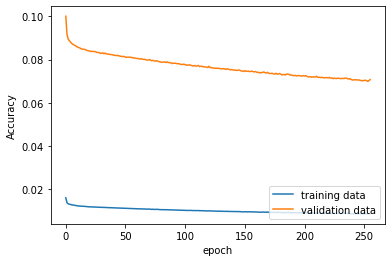

In [22]:
print(historyo.params)
plt.plot(historyo.history['loss']) # replace with accuracy/MAE
plt.plot(historyo.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [23]:
! jupyter nbconvert --to html Activity_7_Learning_Curves.ipynb

[NbConvertApp] Converting notebook Activity_7_Learning_Curves.ipynb to html
[NbConvertApp] Writing 834475 bytes to Activity_7_Learning_Curves.html
